In [1]:
# Install required libraries

import requests
import json
import time
import datetime
from urllib.request import urlopen
import requests
import warnings
from copy import copy
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import osmnx as ox
import networkx as nx
import geopandas as gpd

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pyproj import CRS
import os
import movingpandas as mpd
from shapely.geometry import Point

# Suppress deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Function to convert the datatypes into original
def convert_dtypes(df):
    # Convert 'timestamp' to datetime64[ns]
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    
    # Convert 'geometry' to geometry type if using GeoPandas
    df = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    
    return df
    
# Read and process the CSV file into a DataFrame
geodata_lytton_full_sumo_timesorted = pd.read_csv('C:/Work/Wildfire/data_lytton_br/geodata_lytton_full_sumo_timesorted.csv')
geodata_lytton_full_sumo_timesorted['geometry'] = geodata_lytton_full_sumo_timesorted['geometry'].apply(wkt.loads)
geodata_lytton_full_timesorted = geodata_lytton_full_sumo_timesorted.drop(columns=['sumo_x', 'sumo_y', 'edge_id'])
geodata_lytton_full_timesorted = gpd.GeoDataFrame(geodata_lytton_full_timesorted, geometry='geometry', crs="EPSG:4326")

# Create a duplicate of the 'timestamp' column
geodata_lytton_full_timesorted['t'] = geodata_lytton_full_timesorted['timestamp']
geodata_lytton_full_timesorted.set_index('t', inplace=True)

# Convert to proper datatype
geodata_lytton_full_timesorted = convert_dtypes(geodata_lytton_full_timesorted)

# Display the DataFrame
display(geodata_lytton_full_timesorted)

,device_id,latitude,longitude,horizontal_accuracy,timestamp,Time_diff,TimeDiff,geometry,index_right,Id,lat_matched,long_matched,geometry_matched,depart
t,,,,,,,,,,,,,,
2021-06-20 03:29:34,0087C047-8E2C-4449-812C-0A70E814178B,50.23310,-121.56890,55.0,2021-06-20 03:29:34,0.0,NaN,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),147.074722
2021-06-25 17:26:50,0087C047-8E2C-4449-812C-0A70E814178B,50.23310,-121.56890,65.0,2021-06-25 17:26:50,45.0,45.0,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),281.029167
2021-06-18 07:36:09,00b6bd00-0f23-4284-b112-9b0063f9409f,50.23310,-121.56890,18.0,2021-06-18 07:36:09,0.0,NaN,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),103.184444
2021-06-18 09:40:48,00b6bd00-0f23-4284-b112-9b0063f9409f,50.23310,-121.56890,18.0,2021-06-18 09:40:48,7479.0,7479.0,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),105.261944
2021-06-19 01:10:19,00b79e47-e63e-494a-81b9-4e64a357f36a,50.23330,-121.56670,11.0,2021-06-19 01:10:19,89.0,89.0,POINT (-121.56670 50.23330),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),120.753889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 00:23:12,ff6becdf-f15f-48f3-97ac-090a9116b119,50.23310,-121.56890,17.0,2021-06-16 00:23:12,28.0,28.0,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),47.968611
2021-06-16 00:23:21,ff6becdf-f15f-48f3-97ac-090a9116b119,50.23310,-121.56890,17.0,2021-06-16 00:23:21,9.0,9.0,POINT (-121.56890 50.23310),0,0,50.234470,-121.576936,POINT (-121.5769355 50.2344697),47.971111
2021-06-16 00:23:30,ff6becdf-f15f-48f3-97ac-090a9116b119,50.25666,-121.58674,12.2,2021-06-16 00:23:30,9.0,9.0,POINT (-121.58674 50.25666),0,0,50.255378,-121.589651,POINT (-121.5896511 50.2553784),47.973611


In [3]:
geodata_lytton_full_2 = geodata_lytton_full_timesorted[(geodata_lytton_full_timesorted['timestamp']<'2021-07-03') & (geodata_lytton_full_timesorted['timestamp']>'2021-07-02')]
geodata_lytton_full_2

,device_id,latitude,longitude,horizontal_accuracy,timestamp,Time_diff,TimeDiff,geometry,index_right,Id,lat_matched,long_matched,geometry_matched,depart
t,,,,,,,,,,,,,,
2021-07-02 03:08:16,573ebb92-ab53-4d26-9b17-01a0a58ae3bf,50.446110,-121.70232,2.0,2021-07-02 03:08:16,0.0,NaN,POINT (-121.70232 50.44611),0,0,50.446126,-121.682247,POINT (-121.682247 50.4461262),434.719722
2021-07-02 20:21:07,627711b8-2b0b-4775-9e12-da675235651f,50.421180,-121.34665,6.0,2021-07-02 20:21:07,0.0,NaN,POINT (-121.34665 50.42118),0,0,50.421272,-121.346244,POINT (-121.346244 50.4212722),451.933889
2021-07-02 20:21:57,627711b8-2b0b-4775-9e12-da675235651f,50.421150,-121.34663,6.0,2021-07-02 20:21:57,50.0,50.0,POINT (-121.34663 50.42115),0,0,50.421272,-121.346244,POINT (-121.346244 50.4212722),451.947778
2021-07-02 07:35:06,E0AD3487-82E4-4801-9681-1663C95A5315,50.396057,-121.28041,6.0,2021-07-02 07:35:06,0.0,NaN,POINT (-121.28041 50.39606),0,0,50.396056,-121.280381,POINT (-121.2803812 50.396056),439.166944
2021-07-02 07:35:57,E0AD3487-82E4-4801-9681-1663C95A5315,50.396050,-121.28041,3.0,2021-07-02 07:35:57,1.0,1.0,POINT (-121.28041 50.39605),0,0,50.396056,-121.280381,POINT (-121.2803812 50.396056),439.181111
2021-07-02 07:39:09,E0AD3487-82E4-4801-9681-1663C95A5315,50.420715,-121.33658,14.0,2021-07-02 07:39:09,192.0,192.0,POINT (-121.33658 50.42072),0,0,50.420667,-121.336713,POINT (-121.3367126 50.4206674),439.234444
2021-07-02 07:39:59,E0AD3487-82E4-4801-9681-1663C95A5315,50.420720,-121.33657,14.0,2021-07-02 07:39:59,50.0,50.0,POINT (-121.33657 50.42072),0,0,50.420667,-121.336713,POINT (-121.3367126 50.4206674),439.248333
2021-07-02 07:41:35,E0AD3487-82E4-4801-9681-1663C95A5315,50.423447,-121.34629,12.0,2021-07-02 07:41:35,96.0,96.0,POINT (-121.34629 50.42345),0,0,50.423684,-121.346320,POINT (-121.3463197 50.4236842),439.275000
2021-07-02 07:41:46,E0AD3487-82E4-4801-9681-1663C95A5315,50.423440,-121.34627,9.0,2021-07-02 07:41:46,6.0,6.0,POINT (-121.34627 50.42344),0,0,50.423684,-121.346320,POINT (-121.3463197 50.4236842),439.278056


[-121.91522932   50.0271068  -121.1846385    50.44784075]


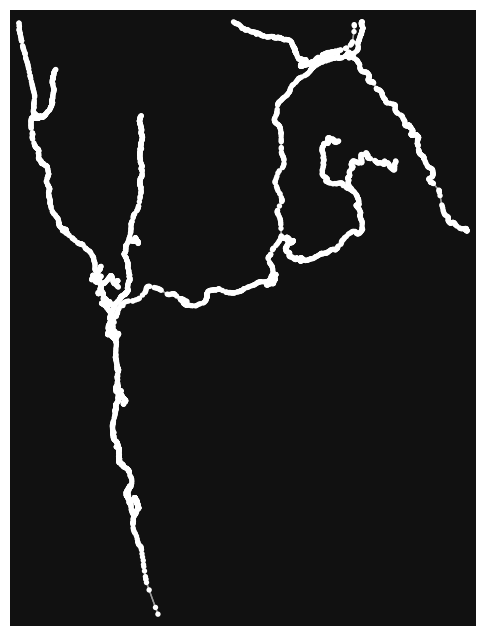

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box

# Load the shapefile
shapefile = gpd.read_file("C:/Work/Wildfire/data_lytton_br/gis/Lytton_Square.shp")

# Reproject the shapefile to WGS 84 (EPSG:4326) for SUMO
shapefile = shapefile.to_crs(epsg=4326)

# Extract the bounding box from the shapefile
bounding_box = shapefile.total_bounds
print(bounding_box)

# Create a bounding box object (optional)
bbox_geom = box(*bounding_box)

# Assuming shapefile has one polygon
polygon = shapefile.geometry.iloc[0] 

# Turn off simplify to obtain a detailed graph; this is important for proper map matching
roads_lytton_square = ox.graph_from_polygon(polygon, network_type='drive', simplify=False)

# Plot the graph
ox.plot_graph(roads_lytton_square, show=True)

In [16]:
# Import roadmap from OSM into UXSim and visualize

from uxsim import *
from uxsim.OSMImporter import OSMImporter

# Convert the OSMNX data for UXSim (Source: https://github.com/toruseo/UXsim/blob/main/uxsim/OSMImporter/OSMImporter.py)
def prepare_for_uxsim(G):
    default_number_of_lanes_mortorway=3
    default_number_of_lanes_trunk=3
    default_number_of_lanes_primary=2
    default_number_of_lanes_secondary=2
    default_number_of_lanes_residential=1
    default_number_of_lanes_tertiary=1, 
    default_number_of_lanes_others=1
    default_maxspeed_mortorway=100
    default_maxspeed_trunk=60
    default_maxspeed_primary=50
    default_maxspeed_secondary=50
    default_maxspeed_residential=30
    default_maxspeed_tertiary=30, 
    default_maxspeed_others=30

    node_dict = {}
    for n in G.nodes:
        nd = G.nodes[n]
        node_dict[n]=[n, nd["x"], nd["y"]]

    links = []
    nodes = {}
    for e in G.edges:
        ed = G.get_edge_data(e[0], e[1])[0]
            
        if "highway" in ed:
            road_type = ed["highway"]
            try:
                name = ed["name"]
                if type(name) == list:
                    name = name[0]
                osmid = ed["osmid"]
                if type(osmid) == list:
                    osmid = osmid[0]
                name += "-"+str(osmid)
            except:
                name = ""
                osmid = ""
            try:
                lanes = int(ed["lanes"])
            except:
                try:
                    if "mortorway" in road_type:
                        lanes = default_number_of_lanes_mortorway
                    elif "trunk" in road_type:
                        lanes = default_number_of_lanes_trunk
                    elif "primary" in road_type:
                        lanes = default_number_of_lanes_primary
                    elif "secondary" in road_type:
                        lanes = default_number_of_lanes_secondary
                    elif "residential" in road_type:
                        lanes = default_number_of_lanes_residential
                    elif "tertiary" in road_type:
                        lanes = default_number_of_lanes_tertiary
                    else:
                        lanes = default_number_of_lanes_others
                except:
                    lanes = default_number_of_lanes_others
                if lanes < 1:
                    lanes = 1
            try:
                maxspeed = float(ed["maxspeed"])/3.6
            except:
                try:
                    if "mortorway" in road_type:
                        maxspeed = default_maxspeed_mortorway/3.6
                    elif "trunk" in road_type:
                        maxspeed = default_maxspeed_trunk/3.6
                    elif "primary" in road_type:
                        maxspeed = default_maxspeed_primary/3.6
                    elif "secondary" in road_type:
                        maxspeed = default_maxspeed_secondary/3.6
                    elif "residential" in road_type:
                        maxspeed = default_maxspeed_residential/3.6
                    elif "tertiary" in road_type:
                        maxspeed = default_maxspeed_tertiary/3.6
                    else:
                        maxspeed = default_maxspeed_others/3.6
                except:
                    maxspeed = default_maxspeed_others/3.6
            

            links.append([name, e[0], e[1], lanes, maxspeed]) # name, from, to, number_of_lanes, maxspeed
            #links.append([name, e[0], e[1], 1, maxspeed]) # name, from, to, number_of_lanes, maxspeed
            nodes[e[0]] = node_dict[e[0]]
            nodes[e[1]] = node_dict[e[1]]

    nodes = list(nodes.values()) 

    return nodes, links

nodes, links = prepare_for_uxsim(roads_lytton_square)

# Simplifying the node
K = World(
    name="",
    deltan=5,
    tmax=7200,
    print_mode=1, save_mode=1, show_mode=0, 
    random_seed=0
)

nodes2, links2 = OSMImporter.osm_network_postprocessing(nodes, links, node_merge_threshold=0.0005, node_merge_iteration=5, enforce_bidirectional=True)
OSMImporter.osm_network_to_World(K, nodes2, links2, default_jam_density=0.2, coef_degree_to_meter=111000)

aggregated network size:
 number of links: 4236
 number of nodes: 2090


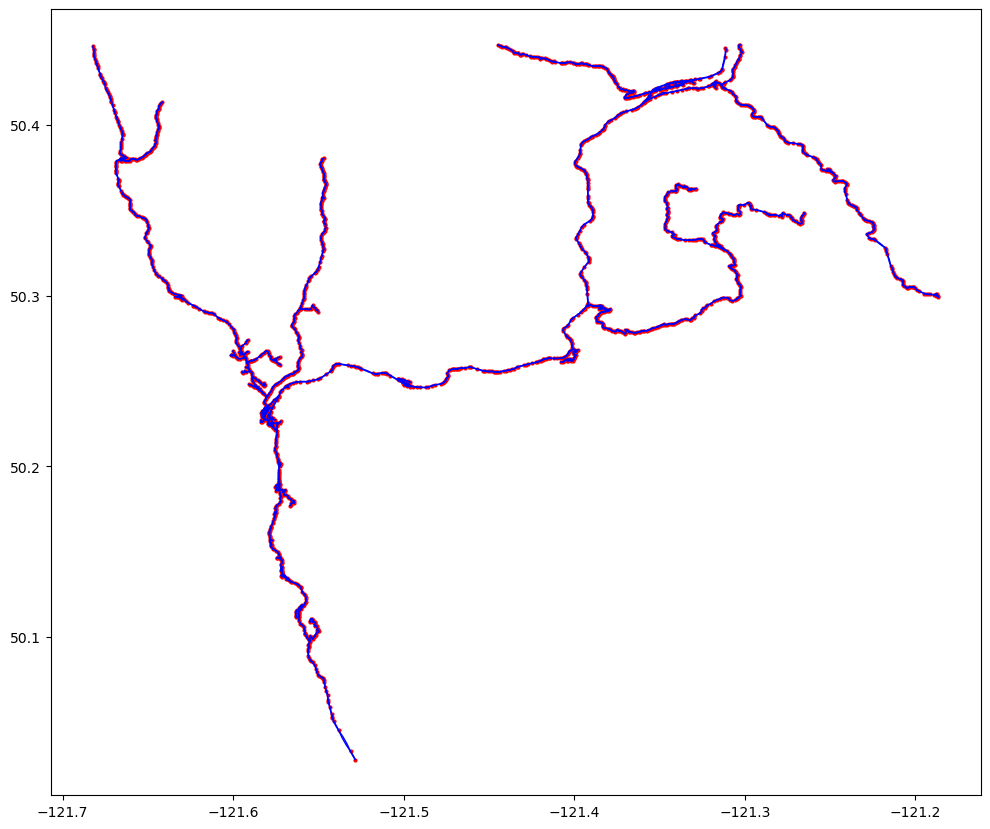

In [9]:
# Visualize the simplified node
OSMImporter.osm_network_visualize(nodes2, links2, show_link_name=0)

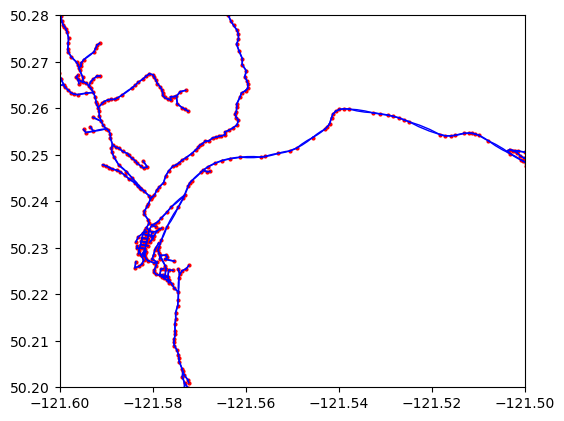

In [10]:
# Visualize the simplified node - zoomed in
OSMImporter.osm_network_visualize(nodes2, links2, show_link_name=0, xlim=[-121.6, -121.5], ylim=[50.2, 50.28], figsize=(6,6))

In [11]:
import pandas as pd

# Assuming df is your DataFrame, and it’s already read into memory
geodata_lytton_full_timesorted = geodata_lytton_full_timesorted.sort_values(by=['device_id', 'timestamp'])

# Initialize the list to store output data
geodata_lytton_full_timesorted_list = []

# Loop through each device_id group
for device_id, group in geodata_lytton_full_timesorted.groupby('device_id'):
    previous_row = None  # Variable to keep track of the previous row
    for idx, row in group.iterrows():
        # If previous row exists and `geometry_matched` changes
        if previous_row is not None and row['geometry_matched'] != previous_row['geometry_matched']:
            # Prepare the row in the specified format
            output_row = [
                previous_row['device_id'],       # device
                previous_row['timestamp'],       # time
                previous_row['long_matched'],    # x_orig
                previous_row['lat_matched'],     # y_orig
                0,                               # radious_orig
                row['long_matched'],             # x_dest
                row['lat_matched'],              # y_dest
                0.5,                             # radious_dest
                previous_row['depart'],          # t_start
                row['depart'],                   # t_end
                -1,                              # static -1
                500,                             # static 500
                None,                            # static None
                True                             # static True
            ]
            # Append the row to the output list
            geodata_lytton_full_timesorted_list.append(output_row)
        
        # Update the previous row to the current row for the next iteration
        previous_row = row

# output now contains the required 2D list of entries
geodata_lytton_full_timesorted_list[:5]

[['02a19a26-8fae-4ae3-92d5-3df832640e0c',
  Timestamp('2021-06-27 00:04:58'),
  -121.5713306,
  50.1350906,
  0,
  -121.5557921,
  50.2496319,
  0.5,
  311.6647222222222,
  311.7030555555556,
  -1,
  500,
  None,
  True],
 ['02aa5f22-3ebd-4619-acce-ba0d852bcfeb',
  Timestamp('2021-06-15 04:18:30'),
  -121.5612205,
  50.2623898,
  0,
  -121.5769355,
  50.2344697,
  0.5,
  27.89027777777778,
  27.891944444444444,
  -1,
  500,
  None,
  True],
 ['02aa5f22-3ebd-4619-acce-ba0d852bcfeb',
  Timestamp('2021-06-15 04:18:36'),
  -121.5769355,
  50.2344697,
  0,
  -121.5612205,
  50.2623898,
  0.5,
  27.891944444444444,
  27.9125,
  -1,
  500,
  None,
  True],
 ['02aa5f22-3ebd-4619-acce-ba0d852bcfeb',
  Timestamp('2021-06-15 04:19:50'),
  -121.5612205,
  50.2623898,
  0,
  -121.5769355,
  50.2344697,
  0.5,
  27.9125,
  27.961388888888887,
  -1,
  500,
  None,
  True],
 ['06f438a0-6e2f-407d-a854-4a6a8a93e007',
  Timestamp('2021-06-14 16:02:25'),
  -121.6605966,
  50.3507412,
  0,
  -121.5961359,


In [12]:
def sort_by_time_value(two_d_list):
    # Sort the list based on the time value of each sublist
    sorted_list = sorted(two_d_list, key=lambda x: x[1])
    return sorted_list

geodata_lytton_full_timesorted_list = sort_by_time_value(geodata_lytton_full_timesorted_list)
geodata_lytton_full_timesorted_list[:5]

[['2e907603-cb5b-49ef-8795-2148822679fe',
  Timestamp('2021-06-14 00:25:05'),
  -121.5830421,
  50.2287084,
  0,
  -121.5830545,
  50.22897,
  0.5,
  0.0,
  400.7938888888889,
  -1,
  500,
  None,
  True],
 ['d23e1ca7-1958-49f5-a81b-3879a41aaa10',
  Timestamp('2021-06-14 00:48:40'),
  -121.4505839,
  50.2554594,
  0,
  -121.5559412,
  50.0889247,
  0.5,
  0.3930555555555555,
  338.2830555555556,
  -1,
  500,
  None,
  True],
 ['5d045d10-17be-44bd-928f-1d2f97fa1b1e',
  Timestamp('2021-06-14 03:51:44'),
  -121.5745054,
  50.2386654,
  0,
  -121.5836857,
  50.2271997,
  0.5,
  3.444166666666667,
  15.338611111111112,
  -1,
  500,
  None,
  True],
 ['5ec67035-1dc9-4451-b6bc-c92cba471269',
  Timestamp('2021-06-14 04:46:47'),
  -121.5836857,
  50.2271997,
  0,
  -121.5769355,
  50.2344697,
  0.5,
  4.361666666666666,
  4.364166666666667,
  -1,
  500,
  None,
  True],
 ['5ec67035-1dc9-4451-b6bc-c92cba471269',
  Timestamp('2021-06-14 04:46:56'),
  -121.5769355,
  50.2344697,
  0,
  -121.583685

In [13]:
# Mapping depart time with actual GPS time
import pandas as pd
from datetime import timedelta

# Define your start_time (you would replace this with your actual start time)
start_time = pd.to_datetime("2021-06-18 00:00:00")

# Set the intervals for depart values (0, 50, 100, 150, etc.)
depart_interval = 40  # You can add more intervals as needed
depart_start = 0
depart_end = 400

# Calculate the corresponding timestamps for each depart interval
timestamp_results = []

for depart in list(range(depart_start, depart_end, depart_interval)):
    # Calculate the time delta in seconds (depart in hours * 3600 seconds)
    time_delta = timedelta(hours=depart)
    
    # Calculate the corresponding timestamp by adding the time delta to start_time
    timestamp = start_time + time_delta
    print('Depart:',depart,'Timestamp',timestamp)

Depart: 0 Timestamp 2021-06-18 00:00:00
Depart: 40 Timestamp 2021-06-19 16:00:00
Depart: 80 Timestamp 2021-06-21 08:00:00
Depart: 120 Timestamp 2021-06-23 00:00:00
Depart: 160 Timestamp 2021-06-24 16:00:00
Depart: 200 Timestamp 2021-06-26 08:00:00
Depart: 240 Timestamp 2021-06-28 00:00:00
Depart: 280 Timestamp 2021-06-29 16:00:00
Depart: 320 Timestamp 2021-07-01 08:00:00
Depart: 360 Timestamp 2021-07-03 00:00:00


In [ ]:
# Adding the demands to the world K

# Assuming K is your traffic simulation object and adddemand_area2area is a method of K
volume = 500

# Iterate over the output list generated in the previous step
for entry in geodata_lytton_full_timesorted_list:
    # Unpack parameters from the entry
    device, time, x_orig, y_orig, radius_orig, x_dest, y_dest, radius_dest, t_start, t_end, *_ = entry
    
    # Call the adddemand_area2area method with unpacked parameters and set volume to 500
    K.adddemand_area2area2(
        x_orig, y_orig, radius_orig,
        x_dest, y_dest, radius_dest,
        t_start, t_end, volume
    )

In [ ]:
K.exec_simulation()

In [ ]:
K.analyzer.print_simple_stats()
K.analyzer.network_anim(animation_speed_inverse=15, detailed=0, network_font_size=0)
K.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.1, interval=10, trace_length=5)

from IPython.display import display, Image
with open("out/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
with open("out/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
